In [36]:
import json
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [37]:
vocab_size = 6421
embedding_dim = 128
max_length = 512
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 1200

In [38]:

file = pd.read_csv('data.csv')
sentences = file['text'].astype(str)
labels = file['offensive']
print(sentences)
print(labels)
str_stop = [
'אנחנו',
'אתן',
'אתם',
'הם',
'הן',
'היא',
'הוא',
'שלו',
'שלך',
'שלה',
'לי',
'לו',
'לה',
'לנו',
'לכם',
'לכן',
'להם',
'להן',
'אותה',
'אותו',
'זה',
'זאת',
'אלה',
'אלו',
'מעל',
'בין',
'עם',
'עד',
'נגר',
'על',
'אל',
'מול',
'של',
'אצל',
'כמו',
'אחר',
'אותו',
'בלי',
'לפני',
'אחרי',
'מאחורי',
'עלי',
'עליו',
'עליה',
'עליך',
'עלינו',
'עליכם',
'לעיכן',
'עליהם',
'עליהן',
'כל',
'כולם',
'כולן',
'כך',
'ככה',
'כזה',
'זה',
'זות',
'ואת',
'את',
'אתכם',
'אתכן',
'איתי',
'איתו',
'איתך',
'איתה',
'איתם',
'איתן',
'איתנו',
'איתכם',
'איתכן',
'יהיה',
'תהיה',
'היתי',
'היתה',
'היה',
'להיות',
'עצמי',
'עצמו',
'עצמה',
'עצמם',
'עצמן',
'עצמנו',
'עצמהם',
'עצמהן',
'מי',
'מה',
'איפה',
'היכן',
'אם',
'לאן',
'איזה',
'מהיכן',
'איך',
'כיצד',
'מתי',
'כאשר',
'כש',
'למרות',
'לפני',
'אחרי',
'למה',
'מדוע',
'כי',
'אך',
'מנין',
'מאין',
'יכל',
'יכלה',
'יכלו',
'יכול',
'יכולה',
'יכולים',
'יכולות',
'יוכלו',
'יוכל',
'מסוגל',
'רק',
'אולי',
'אין',
'לאו',
'אי',
'כלל',
'נגד',
'אם',
'אל',
'אלה',
'אלו',
'אף',
'מעל',
'מצד',
'בשביל',
'באמצע',
'דרך',
'מבעד',
'באמצעות',
'למעלה',
'למטה',
'מחוץ',
'מן',
'לעבר',
'מכאן',
'כאן',
'הנה',
'הרי',
'פה',
'שם',
'אך',
'ברם',
'שוב',
'אבל',
'מבלי',
'בלי',
'מלבד',
'רק',
'בגלל',
'מכיוון',
'אשר',
'ואילו',
'למרות',
'כמו',
'כפי',
'אז',
'אחרי',
'לכן',
'לפיכך',
'מאד',
'עז',
'מעט',
'מעטים',
'במידה',
'שוב',
'מדי',
'גם',
'כן',
'נו',
'אחר',
'אחרת',
'אחרים',
'אחרות',
'אשר',
'או']

0                                               שמן מכוער
1                                                    יכלב
2                                                 בן זונה
3                                                     עלה
4                                                    יגיע
                              ...                        
6417    ובקשר לשאלה על האם מכירים גיינר מומלץ. למה שלא...
6418              כי כל התערובת פחמימה פה היא מלטודקסטרין
6419    זה יותר נפוץ ממה שנראה לעין, לדעתי זה יותר עני...
6420                     מה שכן זה עדיין נראה גבוה בהחרגה
6421                               גיינר לבנאדם שלא מתאמן
Name: text, Length: 6422, dtype: object
0       1
1       1
2       1
3       0
4       0
       ..
6417    0
6418    0
6419    0
6420    0
6421    0
Name: offensive, Length: 6422, dtype: int64


In [39]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [40]:
import codecs
import pickle
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
filtered_sentence = []
for w in training_sentences:
    if w not in str_stop:
        filtered_sentence.append(w) 
tokenizer.fit_on_texts(filtered_sentence)
filtered_sentence_test = []
for w in testing_sentences:
    if w not in str_stop:
        filtered_sentence_test.append(w) 
tokenizer.fit_on_texts(filtered_sentence)

word_index = tokenizer.word_index

#stop_words!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# str_res = []
# str_res.append("\n########before tokenizer###########################################################################\n")
# for i in range(len(training_sentences)):
#     str_res.append(training_sentences[i])

# str_res.append("\n########fter tokenizer###########################################################################\n")

training_sequences = tokenizer.texts_to_sequences(filtered_sentence)
# str_res.append("\n########after sequences#################################################################################\n")
# for i in range(len((tokenizer.texts_to_sequences(training_sentences)))):
#     str_res.append((tokenizer.texts_to_sequences(training_sentences))[i])

# str_totxt = str(str_res)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
# str_res.append("\n########after padding#################################################################################\n")
# for i in range(len(training_padded)):
#     str_res.append(training_padded[i])
# str_totxt = str(str_res)
# # print(str_totxt)
testing_sequences = tokenizer.texts_to_sequences(filtered_sentence_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
# with codecs.open('array.txt', 'w', 'utf8') as f:
#     for i in range(len(str_res)):
#         f.writelines(str(str_res[i]) + "\n")
# with open('tokenizer.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)




In [41]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [42]:
import keras_nlp

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras_nlp.layers.FNetEncoder(intermediate_dim=512),
    tf.keras.layers.Conv1D(512, 1,padding='same'),
    tf.keras.layers.Conv1D(512,2,activation='relu',padding='same'),
    tf.keras.layers.MaxPooling1D(),

    keras_nlp.layers.FNetEncoder(intermediate_dim=512),
    tf.keras.layers.Conv1D(256, 1,padding='same'),
    tf.keras.layers.Conv1D(256,2,activation='relu',padding='same'),
    tf.keras.layers.MaxPooling1D(),

    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
# inputs = tf.keras.Input(shape=(None,), dtype="int32")
# # Embed each integer in a 128-dimensional vector
# x = layers.Embedding(max_features, 128)(inputs)
# # Add 2 bidirectional LSTMs

# model = keras.Model(inputs, outputs)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 512, 128)          821888    
                                                                 
 f_net_encoder_8 (FNetEncode  (None, 512, 128)         132224    
 r)                                                              
                                                                 
 conv1d_16 (Conv1D)          (None, 512, 512)          66048     
                                                                 
 conv1d_17 (Conv1D)          (None, 512, 512)          524800    
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 256, 512)         0         
 1D)                                                             
                                                                 
 f_net_encoder_9 (FNetEncode  (None, 256, 512)        

In [44]:
num_epochs = 20
history = model.fit(training_padded, training_labels,epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/20
38/38 [==============================] - 379s 10s/step - loss: 0.4941 - accuracy: 0.8817 - val_loss: 0.2951 - val_accuracy: 0.9240
Epoch 2/20
38/38 [==============================] - 362s 10s/step - loss: 0.3291 - accuracy: 0.8900 - val_loss: 0.3422 - val_accuracy: 0.9240
Epoch 3/20
18/38 [=============>................] - ETA: 1:08 - loss: 0.2000 - accuracy: 0.8941

In [111]:
with codecs.open('array.txt', 'w', 'utf8') as f:
        
        f.writelines(str(history.history["accuracy"]) + "\n")
        f.writelines(str(history.history["loss"]) + "\n")
        f.writelines(str(history.history["val_accuracy"]) + "\n")
        f.writelines(str(history.history["val_loss"]) + "\n")


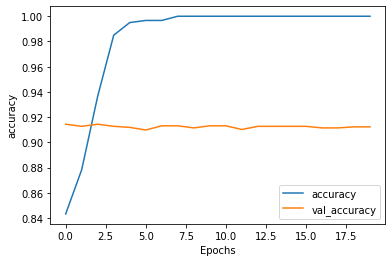

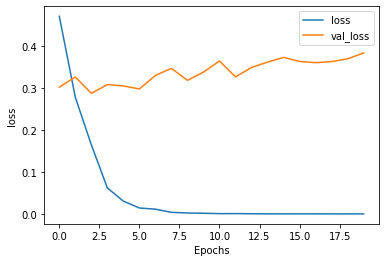

In [102]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [551]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

שמן מכוער ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
בן זונה
1


In [552]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)
model.save('model.h5')


(3000, 16)


In [553]:
# import io

# out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
# out_m = io.open('meta.tsv', 'w', encoding='utf-8')
# for word_num in range(1, 231):
#   word = reverse_word_index[word_num]
#   embeddings = weights[word_num]
#   out_m.write(word + "\n")
#   out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
# out_v.close()
# out_m.close()

In [554]:
import io
import tensorflow as ts
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import os
from keras.models import load_model
model = load_model('model.h5')
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
# path = os.path.dirname(os.path.abspath('model.h5'))
# loaded_model = pickle.load(open(path, 'object.pkl'))
# ts.keras.preprocessing.text.tokenizer_from_json(json.load((io.open('file.json', 'r', encoding='utf-8'))))
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.text import Tokenizer
# tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# # tokenizer = pd.read_csv('vecs.tsv', sep='\t')
# # tokenizer = io.open('vecs.tsv', 'r', encoding='utf-8')
# # tokenizer = Tokenizer.('vecs.tsv')
# model = tf.keras.models.load_model('model.h5')
# # model = io.open('meta.tsv', 'r', encoding='utf-8')
# tokenizer = Tokenizer(io.open('vecs.tsv', 'r', encoding='utf-8'))
# model =  io.open('meta.tsv', 'r', encoding='utf-8')
sentence = [
    'יכלב מה אתה מבלבל בתחת',
    'מזדיין זונה',
    'זין שמנה',
    'תחת',
    'הבן זונה',
    'כמה יגיע?',
    'עלה',
    'מדף',
    'מזדיין בתחת',
    'יכלב מסריח',
    'זונה יפה שלי',
    'יש עלה בתחתית הדף',
    'כוס רטוב ומסריח',
    'כוס תה ממש חם',
    'כלב טוב',
    'כמה אידיוט אתה יכול להיות?'
]
vocab_size = len(sentence)
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=100, padding=padding_type, truncating=trunc_type)
res = (model.predict(padded))
tol =[]
for i in range(len(res)):
    if res[i] > 0.5:
        tol.append(1)
    else:
        tol.append(0)
print(tol)

1/1 [==============================] - 0s 111ms/step
[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1]
